Dado un conjunto de n objetos cuyos tamaños son {T1, T2,··· , Tn}, con Ti ∈ (0,1], se debe empaquetarlos usando la mínima cantidad de envases de capacidad 1. 

Solución por backtracking/fuerza bruta.

In [1]:
# to use deepcopy
from copy import deepcopy
from math import inf

def _empaquetar_back(items, paquetes, tabs=0, len_min=inf):
    if len(items) == 0:
        # print("\t"*tabs, "items:", items)
        # print("\t"*tabs, "paquetes:", paquetes)
        return paquetes
    
    # tomamos el primer item
    item = items.pop(0)

    # agrego un nuevo paquete
    if paquetes == []:
        paquetes.append([item])
        return _empaquetar_back(items.copy(), deepcopy(paquetes), tabs+1)

    # hay que empaquetar el item
    # puede ser en un paquete existente
    # o en un paquete nuevo
    opciones = []
    # print("\t"*tabs, "item:", item)
    # print("\t"*tabs, "paquetes:", paquetes)
    for i in range(len(paquetes)):
        if sum(paquetes[i]) + item <= 1:
            paquetes_copia = deepcopy(paquetes)
            paquetes_copia[i].append(item)
            opcion = _empaquetar_back(items.copy(), paquetes_copia, tabs+1, len_min)
            if len(opcion) < len_min:
               len_min = len(opcion)
               opciones = [opcion]

    
    if len(opciones) + 1 <= len_min:
        paquetes_copia = deepcopy(paquetes)
        paquetes_copia.append([item])
        opciones.append(_empaquetar_back(items.copy(), paquetes_copia, tabs+1, len_min))
                
    # print("\t"*tabs, "opciones:", opciones)
    min = opciones[0]

    for opcion in opciones:
        if len(opcion) < len(min):
            min = opcion

    # print("\t"*tabs, "min:", min)

    return min
            
def empaquetar_back(items):
    paquetes = []
    return _empaquetar_back(items.copy(), paquetes)

In [2]:
items =  [0.5, 0.4, 0.3, 0.2, 0.1]
print(empaquetar_back(items))

# {0.4; 0.8; 0.5; 0.1; 0.7; 0.6; 0.1; 0.4; 0.2; 0.2}
items = [0.4, 0.8, 0.5, 0.1, 0.7, 0.6, 0.1, 0.4, 0.2, 0.2]
print(empaquetar_back(items))

[[0.5, 0.4, 0.1], [0.3, 0.2]]
[[0.4, 0.5, 0.1], [0.8, 0.2], [0.7, 0.1, 0.2], [0.6, 0.4]]


Complejidad:
Hay que hacer todas las combinaciones posibles de items, a pesar de hacer cortes en el arbol de decisiones, la complejidad es exponencial.
Siendo 

Creamos una función que genere sets para hacer las mediciones.

In [3]:
from random import uniform

def generador_items(n):
    return [round(uniform(0.01, 1.00), 2) for _ in range(n)]

In [4]:
import time

tiempos = {}
# for i in range(0, 10, 5):
#     items = generador_items(i)
#     start = time.time()
#     paquetes = empaquetar_back(items)
#     end = time.time()
#     tiempos[i] = end - start

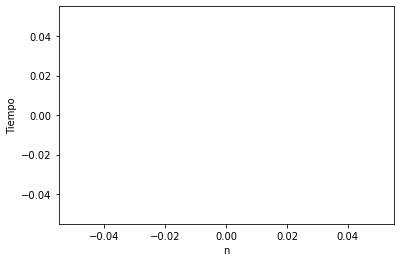

In [5]:
from matplotlib import pyplot as plt

plt.plot(tiempos.keys(), tiempos.values())
plt.xlabel('n')
plt.ylabel('Tiempo')
plt.show()

Algoritmo de aproximación:  
1. Se abre el primer envase y se empaqueta el primer objeto.  
2. Por cada uno de los objetos restantes se prueba si cabe en el envase actual que está abierto.  
a. Si es así, se lo agrega a dicho envase, y se sigue con el siguiente objeto.  
b. Si no entra, se cierra el envase actual, se abre uno nuevo que pasa a ser el envase actual, se empaqueta el objeto y se prosigue con el siguiente.  


In [6]:
def empaquetar_aprox(items):
    paquetes = []
    paquete_actual = []
    for item in items:
        if round(sum(paquete_actual) + item, 4) <= 1:
            paquete_actual.append(item)
        else:
            paquetes.append(paquete_actual)
            paquete_actual = [item]
    paquetes.append(paquete_actual)
    return paquetes

In [7]:
items =  [0.5, 0.4, 0.3, 0.2, 0.1]
print(empaquetar_aprox(items))

# {0.4; 0.8; 0.5; 0.1; 0.7; 0.6; 0.1; 0.4; 0.2; 0.2}
items = [0.4, 0.8, 0.5, 0.1, 0.7, 0.6, 0.1, 0.4, 0.2, 0.2]
print(empaquetar_aprox(items))

[[0.5, 0.4], [0.3, 0.2, 0.1]]
[[0.4], [0.8], [0.5, 0.1], [0.7], [0.6, 0.1], [0.4, 0.2, 0.2]]


Complejidad:  
La complejidad de este algoritmo es O(n), ya que recorre todos los items y asigna cada uno a un envase sin hacer (lo cual es O(1)).

In [8]:
def calcular_tiempo(items, funcion):
    start = time.time()
    funcion(items)
    end = time.time()
    return end - start

In [9]:
import time

tiempos = {}
for i in range(1, 10000, 100):
    todos = []
    for _ in range(100):
        items = generador_items(i)
        todos.append(calcular_tiempo(items, empaquetar_aprox))
    tiempos[i] = sum(todos) / len(todos)

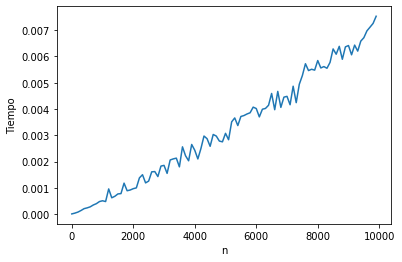

In [10]:
from matplotlib import pyplot as plt

plt.plot(tiempos.keys(), tiempos.values())
plt.xlabel('n')
plt.ylabel('Tiempo')
plt.show()

Implementar alguna otra aproximación (u algoritmo greedy) que les parezca de interés. Comparar sus resultados con los dados por la aproximación del punto 3. Indicar y justificar su complejidad.

In [11]:
def empaquetar_greedy(items):
    #ordenamos los items de mayor a menor
    items.sort(reverse=True)
    paquetes = []

    for item in items:
        
        # si no hay paquetes creo el primero
        if paquetes == []:
            paquetes.append([item])
            continue

        # itero sobre los paquetes
        agregado = False
        for i in range(len(paquetes)):
            # si el item entra en el paquete
            if round(sum(paquetes[i]) + item, 4) <= 1:
                paquetes[i].append(item)
                agregado = True
                break

        # si no entra en ningun paquete
        if not agregado:
            paquetes.append([item])
            
    return paquetes

Complejidad:
La complejidad de este algoritmo es O(n²) ya que recorre todos los items y por cada uno recorre todos los paquetes para ver si entra en alguno (lo cual es O(n)) y si no lo encuentra lo crea, cada operación que se hace es de tiempo constante.

In [12]:
items = [0.5, 0.4, 0.3, 0.2, 0.1]
print(empaquetar_greedy(items))

# {0.4; 0.8; 0.5; 0.1; 0.7; 0.6; 0.1; 0.4; 0.2; 0.2}
items = [0.4, 0.8, 0.5, 0.1, 0.7, 0.6, 0.1, 0.4, 0.2, 0.2]
print(empaquetar_greedy(items))

[[0.5, 0.4, 0.1], [0.3, 0.2]]
[[0.8, 0.2], [0.7, 0.2, 0.1], [0.6, 0.4], [0.5, 0.4, 0.1]]


In [13]:
tiempos_aprox = {}
tiempos_greedy = {}

for i in range(10, 1000, 10):
    todos_aprox = []
    todos_greedy = []
    for _ in range(50):
        items = generador_items(i)
        todos_aprox.append(calcular_tiempo(items, empaquetar_aprox))
        todos_greedy.append(calcular_tiempo(items, empaquetar_greedy))
    tiempos_aprox[i] = sum(todos_aprox) / len(todos_aprox)
    tiempos_greedy[i] = sum(todos_greedy) / len(todos_greedy)

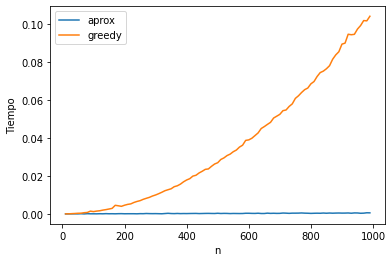

In [14]:
plt.plot(tiempos_aprox.keys(), tiempos_aprox.values(), label="aprox")
plt.plot(tiempos_greedy.keys(), tiempos_greedy.values(), label="greedy")
plt.xlabel('n')
plt.ylabel('Tiempo')
plt.legend()
plt.show()

In [15]:
items1 = generador_items(5)
items2 = generador_items(10)
items3 = generador_items(15)

back1 = empaquetar_back(items1)
back2 = empaquetar_back(items2)
back3 = empaquetar_back(items3)

aprox1 = empaquetar_aprox(items1)
aprox2 = empaquetar_aprox(items2)
aprox3 = empaquetar_aprox(items3)

greedy1 = empaquetar_greedy(items1)
greedy2 = empaquetar_greedy(items2)
greedy3 = empaquetar_greedy(items3)

In [16]:
print("Para 5 items:")
print(f"Backtracking -> {len(back1)} paquetes -> {back1}")
print(f"Sumas paquetes back -> {[sum(p) for p in back1]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in back1]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in back1])}")
print(f"Aproximacion -> {len(aprox1)} paquetes -> {aprox1}")
print(f"Sumas paquetes aprox -> {[sum(p) for p in aprox1]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in aprox1]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in aprox1])}")
print(f"Greedy -> {len(greedy1)} paquetes -> {greedy1}")
print(f"Sumas paquetes greedy -> {[sum(p) for p in greedy1]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in greedy1]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in greedy1])}\n")

print("Para 10 items:")
print(f"Backtracking -> {len(back2)} paquetes -> {back2}")
print(f"sumas paquetes back -> {[sum(p) for p in back2]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in back2]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in back2])}")
print(f"Aproximacion -> {len(aprox2)} paquetes -> {aprox2}")
print(f"sumas paquetes aprox -> {[sum(p) for p in aprox2]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in aprox2]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in aprox2])}")
print(f"Greedy -> {len(greedy2)} paquetes -> {greedy2}")
print(f"sumas paquetes greedy -> {[sum(p) for p in greedy2]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in greedy2]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in greedy2])}\n")

print("Para 15 items:")
print(f"Backtracking -> {len(back3)} paquetes -> {back3}")
print(f"sumas paquetes back -> {[sum(p) for p in back3]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in back3]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in back3])}")
print(f"Aproximacion -> {len(aprox3)} paquetes -> {aprox3}")
print(f"sumas paquetes aprox -> {[sum(p) for p in aprox3]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in aprox3]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in aprox3])}")
print(f"Greedy -> {len(greedy3)} paquetes -> {greedy3}")
print(f"sumas paquetes greedy -> {[sum(p) for p in greedy3]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in greedy3]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in greedy3])}\n")

Para 5 items:
Backtracking -> 5 paquetes -> [[0.78], [0.62], [0.98], [0.95], [0.67]]
Sumas paquetes back -> [0.78, 0.62, 0.98, 0.95, 0.67]
Algun paquete tiene un valor mayor que 1 -> [False, False, False, False, False]
Cantidad de elementos totales -> 5
Aproximacion -> 5 paquetes -> [[0.78], [0.62], [0.98], [0.95], [0.67]]
Sumas paquetes aprox -> [0.78, 0.62, 0.98, 0.95, 0.67]
Algun paquete tiene un valor mayor que 1 -> [False, False, False, False, False]
Cantidad de elementos totales -> 5
Greedy -> 5 paquetes -> [[0.98], [0.95], [0.78], [0.67], [0.62]]
Sumas paquetes greedy -> [0.98, 0.95, 0.78, 0.67, 0.62]
Algun paquete tiene un valor mayor que 1 -> [False, False, False, False, False]
Cantidad de elementos totales -> 5

Para 10 items:
Backtracking -> 6 paquetes -> [[0.63, 0.2], [0.55, 0.43], [0.45, 0.54], [0.3, 0.55], [0.95], [0.76]]
sumas paquetes back -> [0.8300000000000001, 0.98, 0.99, 0.8500000000000001, 0.95, 0.76]
Algun paquete tiene un valor mayor que 1 -> [False, False, False

In [20]:
with open("comparativa.txt", "w") as f:
    for i in range(1, 50, 10):
        items = generador_items(i)
        aprox = empaquetar_aprox(items)
        greedy = empaquetar_greedy(items)
        f.write(f"Para {i} items:\n")
        f.write(f"Aproximacion -> {len(aprox)} paquetes -> {aprox}\n")
        f.write(f"Greedy -> {len(greedy)} paquetes -> {greedy}\n\n")

In [25]:
with open("comparativa2.txt", "w") as f:
    for i in range(1, 2500, 50):
        items = generador_items(i)
        aprox = empaquetar_aprox(items)
        greedy = empaquetar_greedy(items)
        f.write(f"Para {i} items:\n")
        f.write(f"Aproximacion -> {len(aprox)} paquetes\n")
        f.write(f"Greedy -> {len(greedy)} paquetes\n\n")
        f.write(f"Diferecia -> {len(aprox) - len(greedy)}\n\n")

In [18]:
items = [0.69, 0.22, 0.08, 0.62, 0.18, 0.18, 0.59, 0.4, 0.49, 0.49]
back = empaquetar_back(items)
aprox = empaquetar_aprox(items)
greedy = empaquetar_greedy(items)
print(f"Para {len(items)} items:")
print(f"Backtracking -> {len(back)} paquetes -> {back}")
print(f"Sumas paquetes back -> {[sum(p) for p in back]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in back]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in back])}\n")
print(f"Aproximacion -> {len(aprox)} paquetes -> {aprox}")
print(f"Sumas paquetes aprox -> {[sum(p) for p in aprox]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in aprox]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in aprox])}\n")
print(f"Greedy -> {len(greedy)} paquetes -> {greedy}")
print(f"Sumas paquetes greedy -> {[sum(p) for p in greedy]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in greedy]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in greedy])}\n")


Para 10 items:
Backtracking -> 4 paquetes -> [[0.69, 0.22, 0.08], [0.62, 0.18, 0.18], [0.59, 0.4], [0.49, 0.49]]
Sumas paquetes back -> [0.9899999999999999, 0.98, 0.99, 0.98]
Algun paquete tiene un valor mayor que 1 -> [False, False, False, False]
Cantidad de elementos totales -> 10

Aproximacion -> 4 paquetes -> [[0.69, 0.22, 0.08], [0.62, 0.18, 0.18], [0.59, 0.4], [0.49, 0.49]]
Sumas paquetes aprox -> [0.9899999999999999, 0.98, 0.99, 0.98]
Algun paquete tiene un valor mayor que 1 -> [False, False, False, False]
Cantidad de elementos totales -> 10

Greedy -> 4 paquetes -> [[0.69, 0.22, 0.08], [0.62, 0.18, 0.18], [0.59, 0.4], [0.49, 0.49]]
Sumas paquetes greedy -> [0.9899999999999999, 0.98, 0.99, 0.98]
Algun paquete tiene un valor mayor que 1 -> [False, False, False, False]
Cantidad de elementos totales -> 10



In [19]:
items = [0.08, 0.22, 0.49, 0.18, 0.4, 0.59, 0.49, 0.69, 0.18, 0.62]
back = empaquetar_back(items)
aprox = empaquetar_aprox(items)
greedy = empaquetar_greedy(items)
print(f"Para {len(items)} items:")
print(f"Backtracking -> {len(back)} paquetes -> {back}")
print(f"Sumas paquetes back -> {[sum(p) for p in back]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in back]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in back])}\n")
print(f"Aproximacion -> {len(aprox)} paquetes -> {aprox}")
print(f"Sumas paquetes aprox -> {[sum(p) for p in aprox]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in aprox]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in aprox])}\n")
print(f"Greedy -> {len(greedy)} paquetes -> {greedy}")
print(f"Sumas paquetes greedy -> {[sum(p) for p in greedy]}")
print(f"Algun paquete tiene un valor mayor que 1 -> {[sum(p) > 1.0 for p in greedy]}")
print(f"Cantidad de elementos totales -> {sum([len(p) for p in greedy])}\n")

Para 10 items:
Backtracking -> 4 paquetes -> [[0.08, 0.22, 0.69], [0.49, 0.49], [0.18, 0.18, 0.62], [0.4, 0.59]]
Sumas paquetes back -> [0.99, 0.98, 0.98, 0.99]
Algun paquete tiene un valor mayor que 1 -> [False, False, False, False]
Cantidad de elementos totales -> 10

Aproximacion -> 5 paquetes -> [[0.08, 0.22, 0.49, 0.18], [0.4, 0.59], [0.49], [0.69, 0.18], [0.62]]
Sumas paquetes aprox -> [0.97, 0.99, 0.49, 0.8699999999999999, 0.62]
Algun paquete tiene un valor mayor que 1 -> [False, False, False, False, False]
Cantidad de elementos totales -> 10

Greedy -> 4 paquetes -> [[0.69, 0.22, 0.08], [0.62, 0.18, 0.18], [0.59, 0.4], [0.49, 0.49]]
Sumas paquetes greedy -> [0.9899999999999999, 0.98, 0.99, 0.98]
Algun paquete tiene un valor mayor que 1 -> [False, False, False, False]
Cantidad de elementos totales -> 10

